In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/cats-and-dogs/val.csv
/kaggle/input/cats-and-dogs/train.csv
/kaggle/input/cats-and-dogs/val/classname.txt
/kaggle/input/cats-and-dogs/val/dog/havanese_144_jpg.rf.d3e2e8cb9a7801e61894e372c4f1e1bb.jpg
/kaggle/input/cats-and-dogs/val/dog/american_pit_bull_terrier_135_jpg.rf.f23ba7a8a1017fc71e62dcdeb3af9fa9.jpg
/kaggle/input/cats-and-dogs/val/dog/great_pyrenees_190_jpg.rf.ebd07e7aae6a416425fa1f3c89872b61.jpg
/kaggle/input/cats-and-dogs/val/dog/great_pyrenees_144_jpg.rf.d416d150a51cd8c6ae1489957c49e01b.jpg
/kaggle/input/cats-and-dogs/val/dog/chihuahua_17_jpg.rf.d97aa2c7e61de5128686d82b87c95215.jpg
/kaggle/input/cats-and-dogs/val/dog/english_cocker_spaniel_17_jpg.rf.f22312874dde3803847df16bcfe12f83.jpg
/kaggle/input/cats-and-dogs/val/dog/american_bulldog_148_jpg.rf.f0a7b86489589aa05534a6f8cb0fe70a.jpg
/kaggle/input/cats-and-dogs/val/dog/english_cocker_spaniel_121_jpg.rf.db065f7b515f83644b2fcb7525073d0b.jpg
/kaggle/input/cats-and-dogs/val/dog/pomeranian_134_jpg.rf.fb1b528eaddde0

In [2]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

In [3]:
import os
from PIL import Image
from tensorflow.keras.preprocessing.image import ImageDataGenerator

Train Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 275 entries, 0 to 274
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   image:FILE  275 non-null    object
 1   category    275 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 4.4+ KB
None
                                          image:FILE  category
0  train/cat/Sphynx_159_jpg.rf.022528b23ac690c34a...         0
1  train/cat/Persian_139_jpg.rf.0e67f7e0a76dc49d0...         0
2  train/cat/Bengal_150_jpg.rf.05c93a40014062c5ae...         0
3  train/cat/Bombay_140_jpg.rf.15757f698af74453f3...         0
4  train/cat/Persian_128_jpg.rf.16da80c477d1ca2bc...         0

Validation Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70 entries, 0 to 69
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   image:FILE  70 non-null     object
 1   category    70 non-null     in

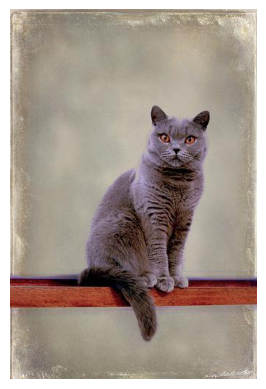

In [4]:

df_train = pd.read_csv("/kaggle/input/cats-and-dogs/train.csv")
df_val = pd.read_csv("/kaggle/input/cats-and-dogs/val.csv")

print("Train Dataset Info:")
print(df_train.info())
print(df_train.head())



print("\nValidation Dataset Info:")
print(df_val.info())
print(df_val.head())


img_path = "/kaggle/input/cats-and-dogs/train/cat/British_Shorthair_166_jpg.rf.d18846beff566700c2e16e295bb701e4.jpg"
img = Image.open(img_path)
plt.imshow(img)
plt.axis("off")
plt.show()


In [5]:
IMAGE_SIZE = (224, 224)
BATCH_SIZE = 32

In [6]:
train_dir = "/kaggle/input/cats-and-dogs/train"
val_dir = "/kaggle/input/cats-and-dogs/val"

In [7]:
train_datagen = ImageDataGenerator(
    rescale=1.0 / 255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode="nearest"
    
)

In [8]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode="binary"
)

Found 275 images belonging to 2 classes.


In [9]:
val_datagen = ImageDataGenerator(rescale=1.0 /255)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode="binary"
)

Found 70 images belonging to 2 classes.


In [10]:
print(train_generator.class_indices)

{'cat': 0, 'dog': 1}


In [11]:
from tensorflow.keras.applications import  MobileNetV2
from tensorflow.keras.layers import Dense, Flatten, Dropout, GlobalAveragePooling2D
from tensorflow.keras.models import Model

In [12]:
base_model = MobileNetV2(weights="imagenet", include_top=False, input_shape=(224, 224, 3))


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [13]:
base_model.trainable = False

In [14]:
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)
output_layer = Dense(1, activation='sigmoid')(x)

model = Model(inputs=base_model.input, outputs=output_layer)

In [15]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [16]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Data Augmentation for Training Set
train_datagen = ImageDataGenerator(
    rescale=1./255,  
    rotation_range=20,  
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2 
)

# Load Training Data
train_generator = train_datagen.flow_from_directory(
    train_dir,  
    target_size=(224, 224),
    batch_size=32,
    class_mode="binary",
    subset="training"
)

# Load Validation Data
val_generator = train_datagen.flow_from_directory(
    val_dir,  
    target_size=(224, 224),
    batch_size=32,
    class_mode="binary",
    subset="validation"
)


Found 220 images belonging to 2 classes.
Found 13 images belonging to 2 classes.


In [17]:
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=10, 
    steps_per_epoch=len(train_generator),
    validation_steps=len(val_generator)
)


Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


7/7 ━━━━━━━━━━━━━━━━━━━━ 15s 1s/step - accuracy: 0.7536 - loss: 0.4527 - val_accuracy: 1.0000 - val_loss: 0.1087
Epoch 2/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 3/10


/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


7/7 ━━━━━━━━━━━━━━━━━━━━ 7s 707ms/step - accuracy: 0.9541 - loss: 0.1740 - val_accuracy: 0.9231 - val_loss: 0.1678
Epoch 4/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 5/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 8s 705ms/step - accuracy: 0.9801 - loss: 0.1324 - val_accuracy: 1.0000 - val_loss: 0.0597
Epoch 6/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 7/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 8s 688ms/step - accuracy: 0.9806 - loss: 0.0415 - val_accuracy: 0.9231 - val_loss: 0.1597
Epoch 8/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 9/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 8s 796ms/step - accuracy: 0.9881 - loss: 0.0389 - val_accuracy: 0.9231 - val_loss: 0.1280
Epoch 10/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00


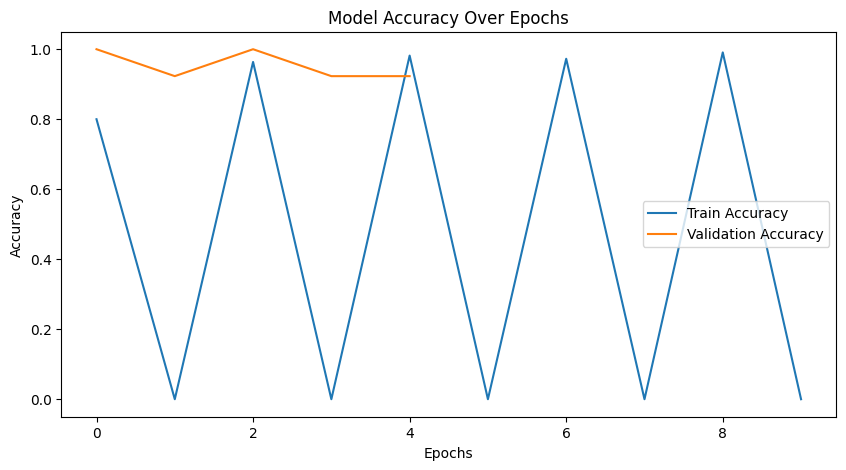

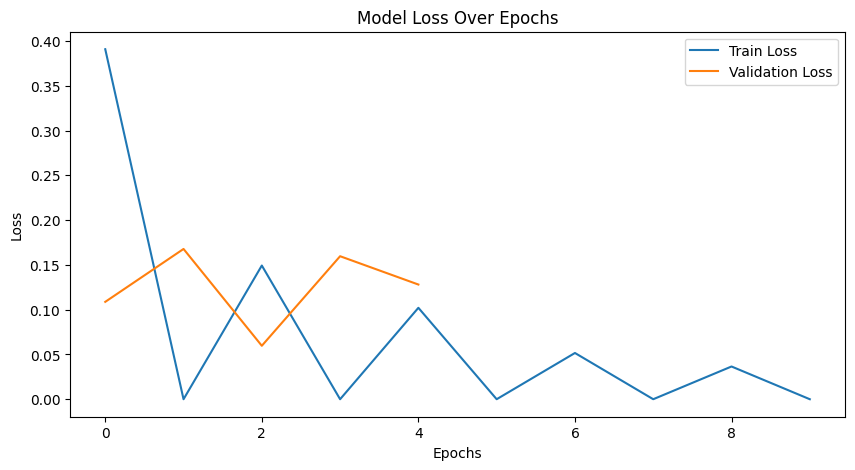

In [18]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy
plt.figure(figsize=(10, 5))
plt.plot(history.history["accuracy"], label="Train Accuracy")
plt.plot(history.history["val_accuracy"], label="Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Model Accuracy Over Epochs")
plt.legend()
plt.show()

# Plot training & validation loss
plt.figure(figsize=(10, 5))
plt.plot(history.history["loss"], label="Train Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Model Loss Over Epochs")
plt.legend()
plt.show()


In [19]:
model.save("best_model.h5")


In [20]:
from tensorflow.keras.models import load_model

model = load_model("best_model.h5")


In [21]:
import numpy as np
from tensorflow.keras.preprocessing import image

# Load image
img_path = "/kaggle/input/cats-and-dogs/val/cat/Birman_163_jpg.rf.de852821da3d65ebd26216dcfb51dd99.jpg"
IMAGE_SIZE = (224, 224)  # Ensure it's a tuple
img = image.load_img(img_path, target_size=IMAGE_SIZE)

# Convert image to array
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
img_array = img_array / 255.0  # Normalize

print("Image processed successfully!")


Image processed successfully!


In [22]:
predictions = model.predict(img_array)

# Get class with highest probability
predicted_class = np.argmax(predictions, axis=1)[0]

# Map predicted class to labels
labels = {0: 'Class A', 1: 'Class B', 2: 'Class C'}  
print(f"Predicted Class: {labels[predicted_class]}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 981ms/step
Predicted Class: Class A


In [23]:
pip install flask


Note: you may need to restart the kernel to use updated packages.
